<a href="https://colab.research.google.com/github/IDF13/mulcam_army/blob/sumin/k-means_clustering(%EC%88%98%EC%A0%95%EC%A4%91).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 데이터 불러오기
댓글을 얼마나 불러와야 할까

In [4]:
# 데이터 불러오기

path = '/content/drive/MyDrive/[공유] Mulcam_Army 공유폴더!/크롤링 한 자료/k-pop_Radar아티스트 크롤링 할당분/수민_결과물/'
comment_file = 'prepro_stats_page_640세븐틴.csv' 

data = pd.read_csv(path+comment_file, encoding='utf-8', header=None)
data.columns = ['comment','like','lang']
print(len(data))
data.head()

83238


,comment,like,lang
0,even if you re not a carat let s all admit it ...,28000.0,(en)
1,this song tells that some song s don t need bi...,1900.0,(en)
2,외국분들 댓글 너무 착하셔세봉이들이 보고 감동했으면 좋겠네요,72.0,(ko)
3,not a fan but i should say that this song is o...,625.0,(en)
4,4 years have passed and this song is still a l...,96.0,(en)


In [5]:
data_ko = pd.DataFrame([kor[:1] for kor in data.values if kor[2] == '(ko)'], columns=['comment'])
data_en = pd.DataFrame([en[:1] for en in data.values if en[2] == '(en)'], columns=['comment'])
data_en.comment.values

array(['even if you re not a carat let s all admit it this song is universal',
       'this song tells that some song s don t need billion views to prove they are legendary ❤️',
       'not a fan but i should say that this song is on another level',
       ..., 'novesuity dino thank you tho 🥰',
       'lui quinto did you watch seventeen project big debut already and hit the road',
       '막내온탑 seventeen im currently watching those'], dtype=object)

In [6]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import re

for i in range(len(data_en.comment)):
    data_en.comment[i] = str(data_en.comment[i])

# 숫자제거 / 밑줄 제외한 특수문자 제거
p = re.compile("[0-7]+")
z = re.compile("[8-9]+")
q = re.compile("\W+")
r = re.compile('[^a-zA-Z]+')

en = []
for i in data_en.comment.values:
    tokens = re.sub(p," ",i)
    tokens = re.sub(z," ",tokens)
    tokens = re.sub(q," ",tokens)
    tokens = re.sub(r," ", tokens)
    en.append(tokens)
len(en)
en[:2]

['even if you re not a carat let s all admit it this song is universal',
 'this song tells that some song s don t need billion views to prove they are legendary ']

In [7]:
# 불용어 제거
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

stop_words = set(stopwords.words('english')) 
# stop_words.update(('song','group','songs','youtube','views','time','https','girl','girls','people','yes','lol','video','part','member','members', 'look','way','guys','fans','fan'))

res=[]
for i in range(len(en)):
    word_tokens = word_tokenize(en[i])

    result = []
    for w in word_tokens: 
        if w not in stop_words: 
            result.append(w) 
    res.append(result)

# print(word_tokens) 
print(res[:10])
print(len(res))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[['even', 'carat', 'let', 'admit', 'song', 'universal'], ['song', 'tells', 'song', 'need', 'billion', 'views', 'prove', 'legendary'], ['fan', 'say', 'song', 'another', 'level'], ['years', 'passed', 'song', 'still', 'legend', 'probably', 'legacy', 'passed', 'different', 'generation', 'generation', 'attacca', 'released', 'october', 'hope', 'able', 'reach', 'new', 'milestone', 'boys', 'lately', 'previous', 'comebacks', 'struggle', 'make', 'views', 'go', 'together', 'almost', 'years', 'ripe', 'already', 'still', 'lack', 'effort', 'whilst', 'seventeen', 'work', 'hard', 'satisfy', 'us', 'every', 'menu', 'aim', 'make', 'u

In [8]:
en_pos = []
for i in range(len(res)):
    tokens_pos = nltk.pos_tag(res[i])
    en_pos.append(tokens_pos)

en_pos[:5]

# 명사는 NN을 포함하고 있음을 알 수 있음
en_NN=[]
for i in range(len(en_pos)):
    NN_words = []
    for word, pos in en_pos[i]:
        if 'NN' in pos:
            NN_words.append(word)
        elif 'NN' in pos:
            NN_words.append(word)
    en_NN.extend(NN_words)
en_NN[:10]

['admit',
 'song',
 'universal',
 'song',
 'tells',
 'views',
 'fan',
 'level',
 'years',
 'song']

# < 순서 >

1. 토큰화_nltk

2. TF-IDF 벡터화

3. K-Means clustering_군집개수가 x인 k-평균을 실시한 후, 군집별로 핵심 단어를 상위 10개씩 추출한다.

4. topic modeling(LDA)_k-평균을 실시한 것 중 상위 카테고리가 명확하고
세부 군집이 필요 없는 5개 군집에 토픽모
델링을 적용하여 군집별로 10개의 단어를 뽑아낸다.



https://www.koreascience.or.kr/article/CFKO201924664106139.pdf

In [9]:
# TF_IDF 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

docs = en_NN
# len(docs)

In [10]:
tfidf = TfidfVectorizer(stop_words=None, 
                        token_pattern='t\w+', 
                                     # 유니그램 바이그램으로 사용
                        min_df = 3,  # 3회 미만으로 등장하는 토큰은 무시
                        max_df =0.95 # 많이 등장한 단어 5%의 토큰도 무시
                        )

docs_tf = tfidf.fit_transform(docs)

# (stop_words='english')
# token_pattern='(?u)\\b\\w+\\b'
# ngram_range : 단어장 생성에 필요한 토큰의 크기       
# list일 경우 : fit['']
# https://wikidocs.net/33661 -> tf-idf 매개변수

# K-Means clustering

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [12]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(docs_tf)
    distortions.append(km.inertia_) # 군집 내 분산, 적을수록 좋음

In [13]:
distortions

[68192.17851400521,
 58023.353018175505,
 55308.18004081766,
 53015.89568069949,
 49628.79579874417,
 51571.75939923988,
 49454.358387348155,
 47570.71517843228,
 48140.92821281203,
 47778.236441266934]

In [14]:
centers = km.cluster_centers_
print(centers)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.70983729e-03 1.10788593e-05 7.38590621e-05 ... 2.21577186e-05
  1.47718124e-05 1.84647655e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


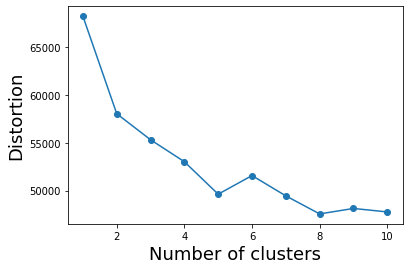

In [15]:
# 최적의 군집 시각화(급격하게 줄어드는 부분)

import matplotlib.pyplot as plt
import numpy as np

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters', fontsize=18)
plt.ylabel('Distortion', fontsize=18)
plt.show()

In [16]:
# ds = pd.DataFrame(docs_tf)
X = np.array(distortions)
data_points = X.reshape(-1,1)
# X = np.array(docs_tf, dtype = object)
# X = np.array(docs_tf).reshape(-1,1)
# X_2 = np.reshape(X,(-1,1))

In [17]:
# X = np.array(distortions)
# K = 2

# data_points = distortions # 변수를 만들어 데이터프레임 값들을 numpy(array) 값으로 초기화
km = KMeans(n_clusters=2, n_init=100, max_iter=10000, tol=1e-04, random_state=0).fit(data_points) # kmeans++ 적용(init의 디폴트값)

In [23]:
cluster_centers = km.cluster_centers_ # 중심점 확인. 실행할 때마다 중심값이 달라짐 

In [24]:
cluster_centers.shape

(2, 1)

In [19]:
cluster_label = km.predict(data_points)

In [20]:
cluster_label

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
docs

In [33]:
# 군집화한 레이블값들을 document_df 에 추가하기

data_en['cluster_label'] = cluster_label
print(data_en.sort_values(by=['cluster_label']))

ValueError: ignored

In [30]:
# 클러스터들의 핵심단어 추출

def get_cluster_details(cluster_model, cluster_data, feature_names,
                       cluster_num, top_n_features=10):
    cluster_details = {}
    # 각 클러스터 레이블별 feature들의 center값들 내림차순으로 정렬 후의 인덱스를 반환
    center_feature_idx = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    # 개별 클러스터 레이블별로 
    for cluster_num in range(cluster_num):
        # 개별 클러스터별 정보를 담을 empty dict할당
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        # 각 feature별 center값들 정렬한 인덱스 중 상위 10개만 추출
        top_ftr_idx = center_feature_idx[cluster_num, :top_n_features]
        top_ftr = [feature_names[idx] for idx in top_ftr_idx]
        # top_ftr_idx를 활용해서 상위 10개 feature들의 center값들 반환
        # 반환하게 되면 array이기 떄문에 리스트로바꾸기
        top_ftr_val = cluster_model.cluster_centers_[cluster_num, top_ftr_idx].tolist()
        
        # cluster_details 딕셔너리에다가 개별 군집 정보 넣어주기
        cluster_details[cluster_num]['top_features'] = top_ftr
        cluster_details[cluster_num]['top_featrues_value'] = top_ftr_val
        # 해당 cluster_num으로 분류된 파일명(문서들) 넣어주기
        filenames = cluster_data[cluster_data['cluster_label']==cluster_num]['filename']
        # filenames가 df으로 반환되기 떄문에 값들만 출력해서 array->list로 변환
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames
    
    return cluster_details

def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print(f"#####Cluster Num: {cluster_num}")
        print()
        print("상위 10개 feature단어들:\n", cluster_detail['top_features'])
        print()
        print(f"Cluster {cluster_num}으로 분류된 문서들:\n{cluster_detail['filenames'][:5]}")
        print('-'*20)

feature_names = tfidf.get_feature_names()
cluster_details = get_cluster_details(cluster_model=km,
                                     cluster_data=data_en,
                                     feature_names=feature_names,
                                     cluster_num=3,
                                     top_n_features=10)
print_cluster_details(cluster_details)

KeyError: ignored

In [ ]:

kmeans = KMeans(n_clusters=3, max_iter=10000, random_state=42)
# 비지도 학습이니 feature로만 학습시키고 예측
cluster_label = kmeans.fit_predict(ftr_vect)

# 군집화한 레이블값들을 document_df 에 추가하기
document_df['cluster_label'] = cluster_label
print(document_df.sort_values(by=['cluster_label']))

# 핵심단어 10개 추출

In [ ]:
#9. 빈도분석
from collections import Counter

c = Counter(en_NN) # input type should be a list of words (or tokens)
k = 20
print(c.most_common(k)) # 빈도수 기준 상위 k개 단어 출력
# 데이터 개수가 많은 순으로 배열 리턴

In [ ]:
# 결과 분석을 위해 각 토픽 당 중요 단어 10개 출력 (BoW 기반)
n_top_word = 10
feature_name = count.get_feature_names()

for topic_idx, topic in enumerate(lda.components_):
  print("토픽 %d:" % (topic_idx+1))
  print([feature_name[i] for i in topic.argsort()[:-n_top_word - 1: -1]])

# LDA 사용 (tf-idf 기반)
lda_tfidf = LatentDirichletAllocation(n_components = 6,
                                      random_state = 1,
                                      learning_method = 'batch')

X_topics = lda_tfidf.fit_transform(docs_tf)

In [ ]:
"""# 잠재 디리클레 할당을 사용한 토픽 모델링"""

# LDA 사용 (BoW 기반)
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components = 5,
                                random_state = 1,
                                learning_method = 'batch')

X_topics = lda.fit_transform(bag)

# 결과 분석을 위해 각 토픽 당 중요 단어 10개 출력 (BoW 기반)
n_top_word = 10
feature_name = count.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
  print("토픽 %d:" % (topic_idx+1))
  print([feature_name[i] for i in topic.argsort()[:-n_top_word - 1: -1]])

# LDA 사용 (tf-idf 기반)
lda_tfidf = LatentDirichletAllocation(n_components = 6,
                                      random_state = 1,
                                      learning_method = 'batch')

X_topics = lda_tfidf.fit_transform(docs_tf)

# 결과 분석을 위해 각 토픽 당 중요 단어 10개 출력 (tf-idf 기반)
n_top_word = 5
feature_name = count.get_feature_names()
for topic_idx, topic in enumerate(lda_tfidf.components_):
  print("토픽 %d:" % (topic_idx+1))
  print([feature_name[i] for i in topic.argsort()[:-n_top_word - 1: -1]])

# 문서 유사도

In [ ]:
# 클러스터링된 문서들 중에서 특정 문서를 하나 선택한 후 비슷한 문서 추출
from sklearn.metrics.pairwise import cosine_similarity

hotel_idx = document_df[document_df['cluster_label']==1].index
print("호텔 카테고리로 클러스터링된 문서들의 인덱스:\n",hotel_idx)
print()
# 호텔 카테고리로 클러스터링 된 문서들의 인덱스 중 하나 선택해 비교 기준으로 삼을 문서 선정
comparison_doc = document_df.iloc[hotel_idx[0]]['filename']
print("##유사도 비교 기준 문서 이름:",comparison_doc,'##')
print()

# 위에서 추출한 호텔 카테고리로 클러스터링된 문서들의 인덱스 중 0번인덱스(비교기준문서)제외한
# 다른 문서들과의 유사도 측정
similarity = cosine_similarity(ftr_vect[hotel_idx[0]], ftr_vect[hotel_idx])
print(similarity)

In [ ]:
# 다음은 위에서 유사도를 측정한 값들로 선정한 'battery-life_ipod_nono_8gb' 라는 주제의 문서가 어떤 문서들과 유사도가 큰지 시각화해보자. 

In [ ]:
# 비교기준 문서와 다른 문서들간의 유사도 살펴보기
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# array 내림차순으로 정렬한 후 인덱스 반환 [:,::-1] 모든행에 대해서 열을 내림차순으로!
sorted_idx = similarity.argsort()[:,::-1]
# 비교문서 당사자는 제외한 인덱스 추출
sorted_idx = sorted_idx[:, 1:]

# 유사도가 큰 순으로 hotel_idx(label=1인 즉, 호텔과관련된 내용의 문서이름들의 index들)에서 재 정렬 
# index로 넣으려면 1차원으로 reshape해주기!
hotel_sorted_idx = hotel_idx[sorted_idx.reshape(-1,)]
# 유사도 행렬값들을 유사도가 큰 순으로 재정렬(비교 문서 당사자는 제외)
hotel_sim_values = np.sort(similarity.reshape(-1,))[::-1]
hotel_sim_values = hotel_sim_values[1:]
# 이렇게 되면 비교문서와 가장 유사한 순으로 '해당문서의index-유사도값' 으로 동일한 위치가 매핑된 두 개의 array!
# 그래서 그대로 데이터프레임의 각 칼럼으로 넣어주기
print(hotel_sorted_idx)
print(hotel_sim_values)
print()
print("길이 비교", len(hotel_sorted_idx), len(hotel_sim_values))
print()
# 빈 데이터프레임 생성
hotel_sim_df = pd.DataFrame()
# hotel_sorted_idx 와 hotel_sim_values 매핑시킨 array임
hotel_sim_df['filename'] = document_df.iloc[hotel_sorted_idx]['filename']
hotel_sim_df['similarity'] = hotel_sim_values

plt.figure(figsize=(15,10))
sns.barplot(data=hotel_sim_df, x='similarity', y='filename')
plt.title(comparison_doc)

# 시각화

IndexError: ignored

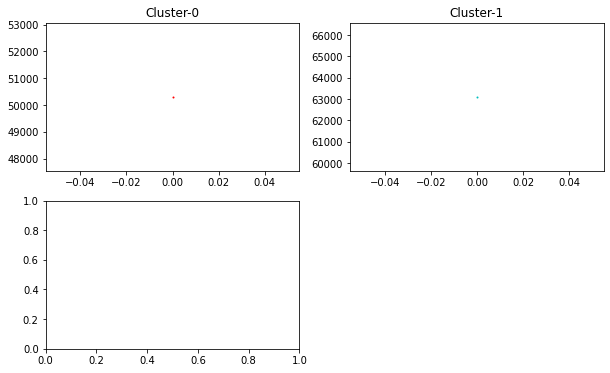

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 6))
colors = "bgrcmykw"
centXY = km.cluster_centers_

for i in range(K):
    s = 'pattern-' + str(i)
    p = fig.add_subplot(2, (K+1)//2, i+1)
    p.plot(centXY[i], 'b-o', markersize=1, color=colors[np.random.randint(0, 7)], linewidth=1.0)
    p.set_title('Cluster-' + str(i))

plt.tight_layout()
plt.show()

In [ ]:
# Scatter plot with hue and col
sns.lmplot(x, y, hue = 'clustering', col = 'time', data = la)
plt.show()

NameError: ignored

In [ ]:
# 결과값을 시각화

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

sns.lmplot('x','y', data=la, fit_reg=False, scatter_kws={'s':150}, hue ='cluster') 

plt.title('K-means clustering')
plt.xlabel('x')
plt.ylabel('y')
sns.plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:605: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data = data[cols]


IndexError: ignored

In [ ]:
# Centroid pattern을 그린다

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 6))
colors = "bgrcmykw"
centXY = km.cluster_centers_

for i in range(K):
    s = 'pattern-' + str(i)
    p = fig.add_subplot(2, (K+1)//2, i+1)
    p.plot(centXY[i], 'b-o', markersize=3, color=colors[np.random.randint(0, 7)], linewidth=1.0)
    p.set_title('Cluster-' + str(i))

plt.tight_layout()
plt.show()

In [ ]:

# 데이터 패턴 몇 개만 그려본다.
cluster = 7
ds['cluster'] = y_km
plt.figure(figsize=(6, 6))
p = ds.loc[ds['cluster'] == cluster]
p = p.sample(frac=1).reset_index(drop=True)
for i in range(10):
    plt.plot(p.iloc[i][0:20])
    
plt.title('Cluster-' + str(cluster))
plt.show()


In [ ]:
# 학습 데이터를 K 그룹으로 분류한다.
# km = KMeans(n_clusters=K, init='random', n_init=100, max_iter=300, tol=1e-04, random_state=0)
# km1 = km.fit(X)
y_km = km1.predict(X)

kmeans.labels_ # 분류된 값 확인

df['cluster'] = kmeans.labels_ #'cluster' = 속성값. labels = 아이디값
df.head(30)

irisDF['target'] = iris.target
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

# 결과값을 시각화

sns.Implot('x','y', data=df, fit_reg=False, scatter_kws={'s':150}, hue ='cluster') 

plt.title('K-means clustering')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
# a = np.array([[1, 2], [3, 4]]) # a.shape=(2, 2)
# b = np.array([[5, 6]]) # b.shape=(2, 1)

# np.concatenate((a, b), axis=0)
# # array([[1, 2],
# #        [3, 4],
# #        [5, 6]])

# a_re = a.reshape((1, 2, 2))
# b_re = b.reshape((1, 2, 2))

# np.concatenate((a_re, b_re), axis=0) # shape=(2, 2, 2)
# # array([[[1, 2],
# #         [3, 4]],

# #        [[5, 6],
# #         [7, 8]]])


# https://everyday-image-processing.tistory.com/87

In [ ]:
# ds = pd.DataFrame(docs_tf)
# X = np.array(docs_tf)
# X = np.array(docs_tf, dtype = object)
# X = np.array(docs_tf).reshape(-1,1)
# X_2 = np.reshape(X,(-1,1))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

sns.lmplot('x','y', data=X, fit_reg=False, scatter_kws={'s':100}) # x = x-axis, y = y-axis, marker size = 100. 선X = fit_reg=Fals 

plt.title('graph')
plt.xlabel('x')
plt.ylabel('y')
print(plt)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:605: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data = data[cols]


IndexError: ignored

In [ ]:
# X = np.array(docs_tf, dtype = object)
# # X_2 = np.reshape(X,(-1,1)) ->

# ds = pd.DataFrame(X, columns = ['1','2','3'])
# ds.shape()

ValueError: ignored

In [ ]:
# type(X)
# X.dtype
# array = np.array(list(temp_dict.values()), dtype = object)
# np.array([''])

distortions = []

for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(distortions)
    distortions.append(km.inertia_) # 군집 내 분산, 적을수록 좋음

# numpy로 처리 -> df로 변경 https://lynnn.tistory.com/89 

ValueError: ignored

In [ ]:
# stock pattern 데이터 세트를 읽어온다
# ds = pd.read_csv('data/stockPattern.csv')
X = np.array(docs_tf)
K = 3

type(X)

numpy.ndarray

In [ ]:
ds = pd.DataFrame(X)

In [ ]:
# 데이터 시각화

# df = pd.DataFrame(columns=['x','y'])
# df.loc[0] = [x,y값]
# ...

sns.lmplot('x','y', data=ds, fit_reg=False, scatter_kws={'s':100}) # x = x-axis, y = y-axis, marker size = 100. 선X = fit_reg=Fals 

plt.title('K-means clustering')
plt.xlabel('x')
plt.ylabel('y')
print(plt)

# clustering

matplotlib 시각화 : http://doc.mindscale.kr/km/python/11.html

In [ ]:
!pip install seaborn

In [ ]:
# 데이터 시각화

sns. ('x','y', data=ds, fit_reg=False, scatter_kws={'s':100}) # x = x-axis, y = y-axis, marker size = 100. 선X = fit_reg=Fals 

plt.title('K-means clustering')
plt.xlabel('x')
plt.ylabel('y')

# k - means
n_clusters = 군집화 갯수

init = 초기 군집 중심점 좌표 설정 방식

max_iter = 최대반복횟수

fit or fit_transform 으로 군집화 수행


In [ ]:
# 학습 데이터를 K 그룹으로 분류한다.
km = KMeans(n_clusters=K, init='random', n_init=100, max_iter=300, tol=1e-04, random_state=0)
km1 = km.fit(X)
y_km = km1.predict(X)

kmeans.labels_ # 분류된 값 확인

df['cluster'] = kmeans.labels_ #'cluster' = 속성값. labels = 아이디값
df.head(30)

irisDF['target'] = iris.target
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

# 결과값을 시각화

sns.Implot('x','y', data=df, fit_reg=False, scatter_kws={'s':150}, hue ='cluster') 

plt.title('K-means clustering')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
# Centroid pattern을 그린다
fig = plt.figure(figsize=(10, 6))
colors = "bgrcmykw"
centXY = km.cluster_centers_
for i in range(K):
    s = 'pattern-' + str(i)
    p = fig.add_subplot(2, (K+1)//2, i+1)
    p.plot(centXY[i], 'b-o', markersize=3, color=colors[np.random.randint(0, 7)], linewidth=1.0)
    p.set_title('Cluster-' + str(i))

plt.tight_layout()
plt.show()

# 데이터 패턴 몇 개만 그려본다.
cluster = 7
ds['cluster'] = y_km
plt.figure(figsize=(6, 6))
p = ds.loc[ds['cluster'] == cluster]
p = p.sample(frac=1).reset_index(drop=True)
for i in range(10):
    plt.plot(p.iloc[i][0:20])
    
plt.title('Cluster-' + str(cluster))
plt.show()


In [ ]:
df = pd.DataFrame(columns=['x','y'])

df.loc[0] = [x,y값]
...

# df1 = pd.DataFrame(data=iris.data, columns=['','','',''])

In [ ]:
df.head(30)

In [ ]:
# 데이터 시각화

sns.Implot('x','y', data=df, fit_reg=False, scatter_kws={'s':100})

plt.title('K-means clustering')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
kmeans.labels_ # 어떤 군집에 속하는지


# PCA(차원축소)

비지도학습_분산 가장 적은 선(축)으로 차원축소

(가장 데이터가 유실되지 않는 방향으로) 


- - - -

하기 전에 scaling 해줄 것!

3차원 이하의 데이터로 만듬

노이즈 감소

메모리 절약 -> 성능 좋아짐 

In [ ]:
# scaling(standarize, normalization)
# https://www.youtube.com/watch?v=DUJ2vwjRQag

X = df(['calory','breakfast','lunch','dinner','exercise']) # X is feature vectors
X.head()

Y = df[['body_shape']] # Y is labels
Y.head()

from sklearn.preprocessing import StandardScaler
x_std = standardscaler.fit_transform(x)
x_std

import numpy as np
features = x_std.T # features are columns from x_std # T : transformation
covariance_matrix = np.cov(features) # numpy 의 covariance_matrix
print(covariance_matrix)